<h1> Ford Car Price Analysis - Scott Morris<h1>

<h3>Project Introduction<h3>

The dataset used for this notebook comes from Kaggle. It contains a csv file containing data on Ford brand cars and their various advertised features such as price, miles per gallon, year made. Using data science, visualization, and machine learning methods, I show what we can gain from using this stored data to possibly show more insight on what makes a car more valuable. 

Dataset: [Ford Car Price Prediction](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction)

In [1]:
import numpy as np
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt 
import tqdm
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier

<h1>Dataset Introduction & Observations<h1>

<p>As we can see from a first look at the DataFrame, it seems to be clean and well organized. There are 9 columns within our datset: Model, Year, Price, Transmission, Mileage, Fuel Type, Tax, MPG (Miles Per Gallon), and Engine Size with 17,966 entries. There are no null values in any columns. We'll now do a deeper exploration into some of these columns individually to see if we find anything interesting to take note of.<p>

In [2]:
ford = pd.read_csv('ford.csv')
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
ford.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Looking at the value count of car Models in the dataset, the models that appear the most in our dataset are the Ford Firsta, Focus, Kuga, Ecosport and C-Max. There are also a few models that only appear once or twice.

In [5]:
ford.model.value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

<AxesSubplot:xlabel='model', ylabel='count'>

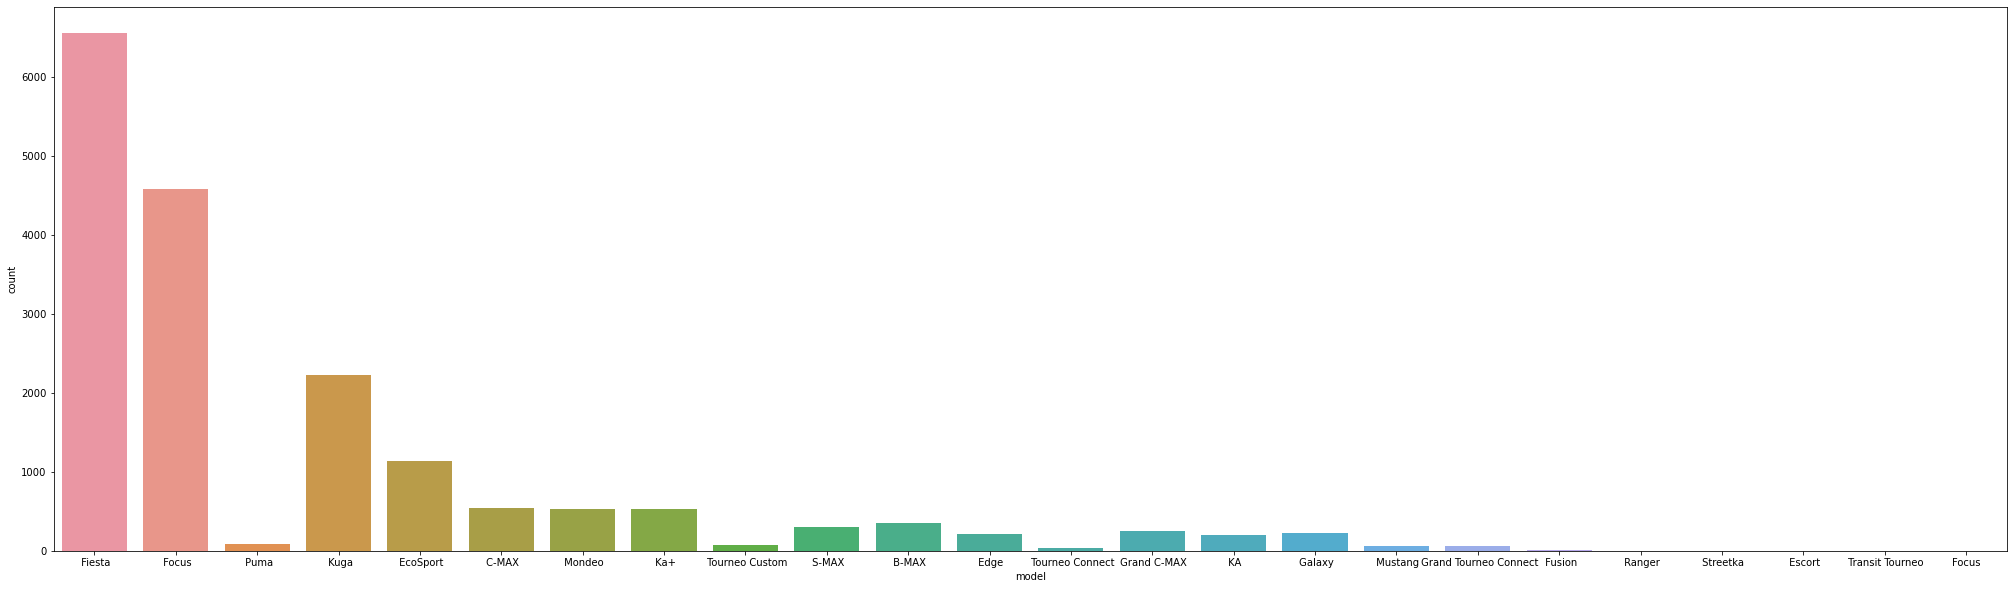

In [6]:
fig = plt.subplots(1,figsize=(35,10))
sns.countplot(x=ford.model)

The value counts for car model year release that our dataset has a range of cars released from 1996-2020. Most of the cars in the dataset were released from 2015-2019. Interestingly, there's also data for a car set to release in 2060, which we are very far away from!

<AxesSubplot:xlabel='year', ylabel='count'>

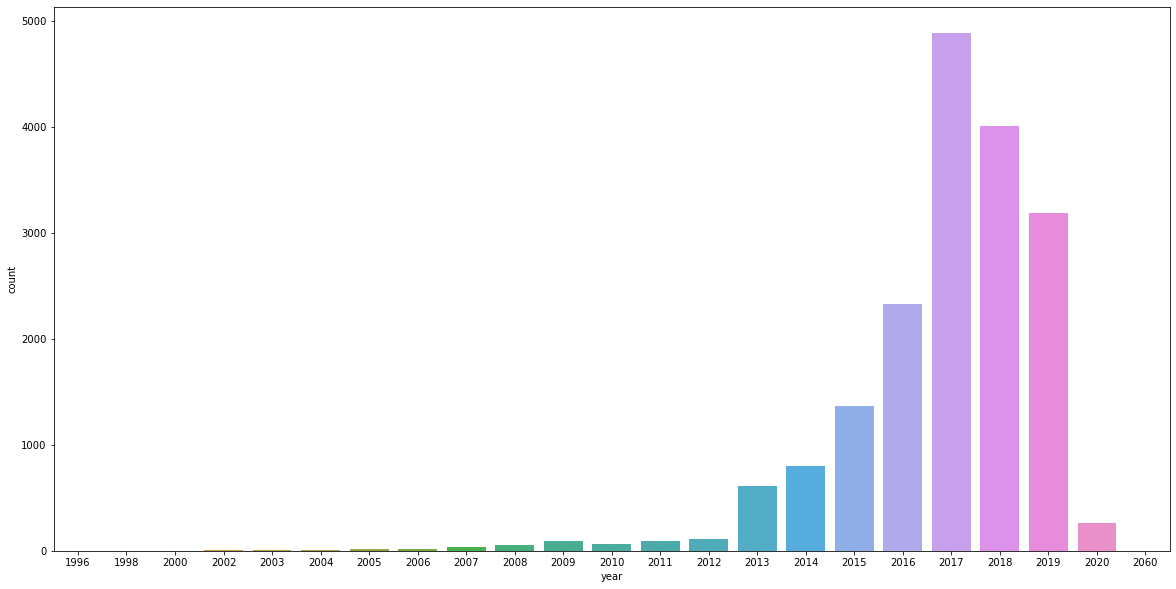

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x=ford.year)

Looking at the other columns such as transmission, fuel type, and engine size we can see that the data is not very balanced. An overwhelming majority of the cars in our dataset have manual transmission, use either petrol or disel fuel, and most cars have an engine size of 1. Also something to take note of is that the engine size column has some zero values. That doesn't sound right for a working car!

<AxesSubplot:xlabel='transmission', ylabel='count'>

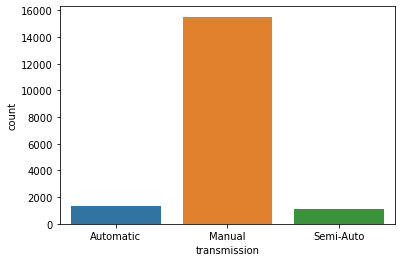

In [8]:
sns.countplot(x=ford.transmission)

<AxesSubplot:xlabel='fuelType', ylabel='count'>

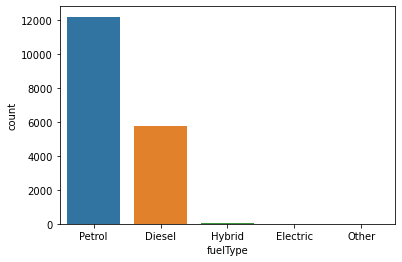

In [9]:
sns.countplot(x=ford.fuelType)

<AxesSubplot:xlabel='engineSize', ylabel='count'>

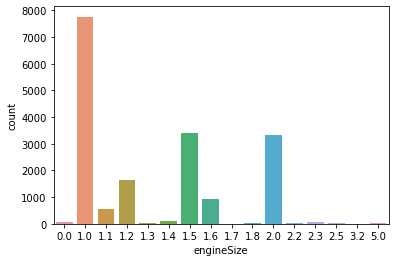

In [10]:
sns.countplot(x=ford.engineSize)

<h1>DataFrame Formatting<h1>

Before beginning to analyze my data, there a few changes to the DataFrame I want to make. These changes include removing information that wouldn't be relevant to answering my question and getting rid of outliers in the data that doesn't make sense to include. My first change was to remove the row of data containing the car coming out in 2060 as it is irrelevant in comparison to the rest of the data and is only speculative as it is in the future.

In [11]:
ford.loc[ford.year==2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [12]:
ford = ford.drop(17726)
ford.year.max()

2020

I also decided to remove all the values where engine size was equal to zero. I did this as all cars require engines to function and having engine sizes at zero could hurt future predictions. This brings our total number of rows to 17,914.

In [13]:
ford.loc[ford.engineSize < 1.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


In [14]:
ford = ford[ford.engineSize != 0.0]
ford.engineSize.min()

1.0

<h1>Visualizing Car Price<h1>

From the dataset, there are a few questions we can attempt to answer with the information we have. The questions we'll focus on are: 

- What correlations can we find between car price and other columns. 
- How well can we predict the price of a car?

<h3>Price Correlation<h3>

Looking at the correlation between numerical columns, we see that car price has positive correlations with release year, engine size and tax, and negative correlations with mileage and miles per gallon.

In [15]:
ford.price.describe()

count    17914.000000
mean     12281.289103
std       4743.641951
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

[Text(0.5, 1.0, 'Correlation Heatmap')]

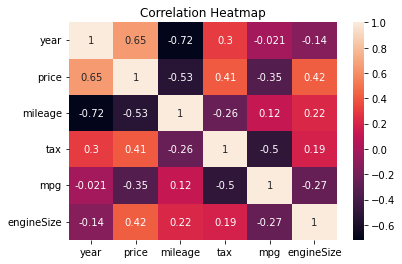

In [30]:
sns.heatmap(ford.corr(), annot=True).set(title="Correlation Heatmap")

From calculating the standard deviation and graphing the density distribution of car prices in the data we can see 50% of our car prices resides between the minimum 495 and 11,291.

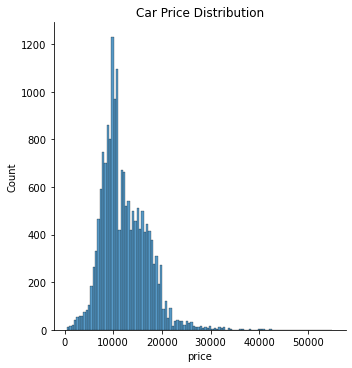

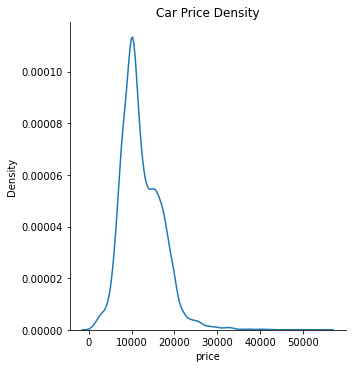

In [31]:
sns.displot(x=ford.price).set(title="Car Price Distribution")
sns.displot(x=ford.price, kind="kde").set(title="Car Price Density")

Below we have scatterplots comparing price to car release year, miles per gallon, mileage, and engine size. Unsurprisingly, cars have gotten more expensive as time has went on. We can also note from comparing car price and engine size that cars with an engine size of 5 have a higher starting price than other cars. From comparing car price and mileage, the more mileage a car has, the less expensive it is.

[Text(0.5, 1.0, 'Car Price vs Car Release Year')]

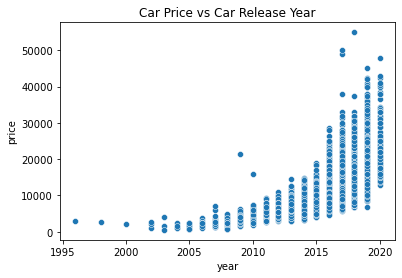

In [32]:
sns.scatterplot(x=ford.year, y=ford.price).set(title="Car Price vs Car Release Year")

[Text(0.5, 1.0, 'Car Price vs Miles Per Gallon')]

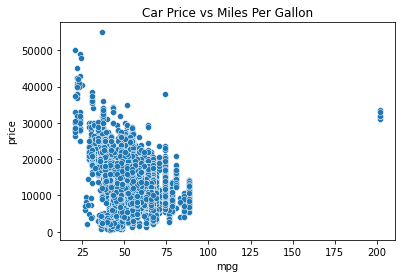

In [33]:
sns.scatterplot(x=ford.mpg, y=ford.price).set(title="Car Price vs Miles Per Gallon")

[Text(0.5, 1.0, 'Car Price vs Mileage')]

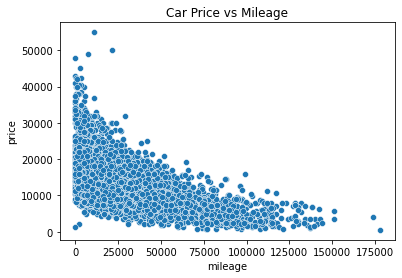

In [34]:
sns.scatterplot(x=ford.mileage, y=ford.price).set(title="Car Price vs Mileage")

[Text(0.5, 1.0, 'Car Price vs Engine Size')]

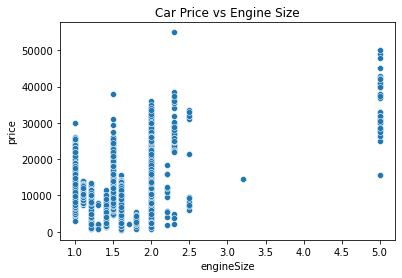

In [35]:
sns.scatterplot(x=ford.engineSize, y=ford.price).set(title="Car Price vs Engine Size")

From the boxplot of Ford Car Models against price, we can see that the most expensive model is terms of range is the Ford Mustang. We can also see that some models have a few outliers in terms of price than the majority of other cars of the same model. 

[Text(0.5, 1.0, 'Car Price vs Car Model')]

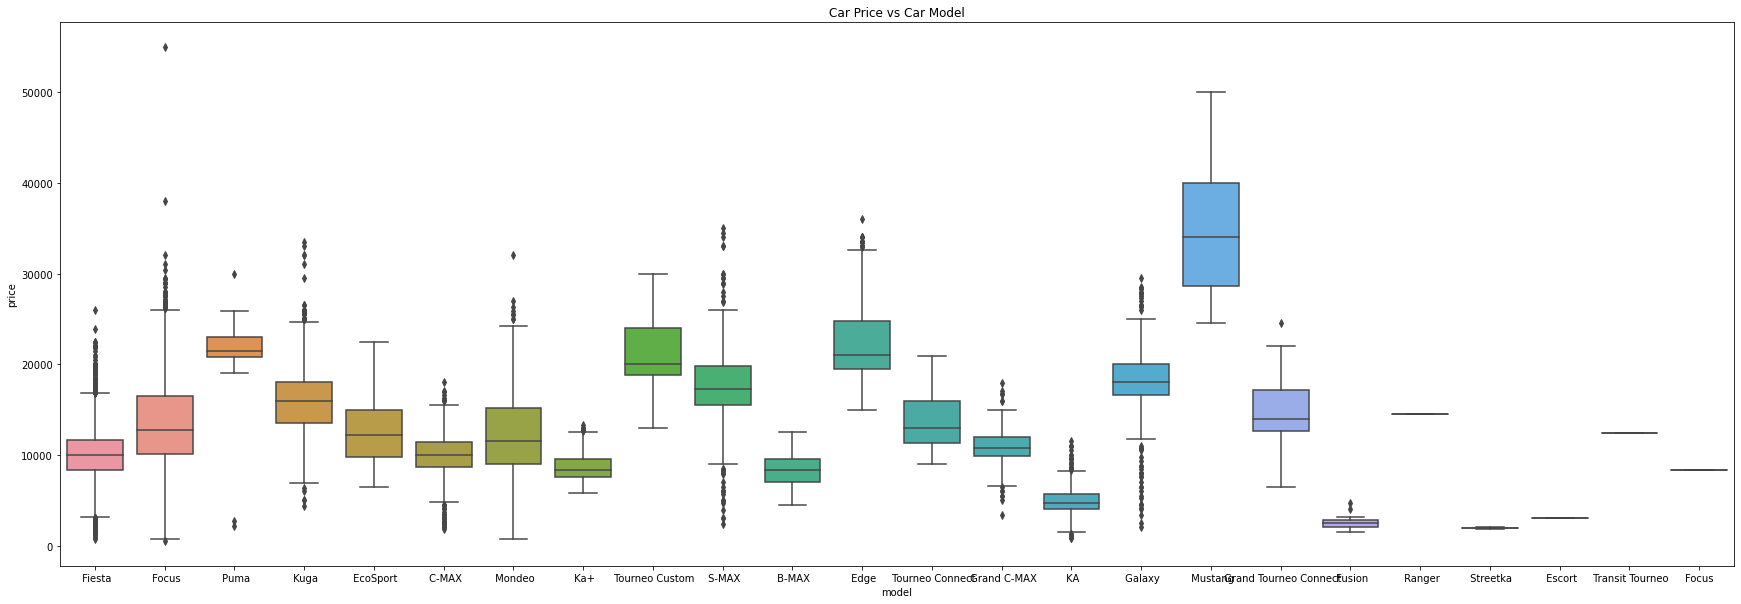

In [36]:
plt.subplots(1,figsize=(30,10))
plt.title="Car Model Prices"
sns.boxplot(x=ford.model,y=ford.price).set(title="Car Price vs Car Model")

<h3>Predicting Car Price<h3>

To predict car price, there are still some changes we need to make to our dataset to help our model make more accurate predictions. Specifically, we will use sklearn's LabelEncoder encoding on our object columns: Transmission, Fuel type, and Model to make them numerical labels and create a new DataFrame joining the data and dropping the old columns.

In [23]:
inputs = ford.drop('price',axis='columns')
target = ford.price

In [24]:
df1 = LabelEncoder()
df2 = LabelEncoder()
df3 = LabelEncoder()

In [25]:
inputs['transmission_n'] = df1.fit_transform(inputs['transmission'])
inputs['fuelType_n'] = df2.fit_transform(inputs['fuelType'])
inputs['model_n'] = df3.fit_transform(inputs['model'])
inputs.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,transmission_n,fuelType_n,model_n
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,0,4,5
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,1,4,6
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,1,4,6
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,1,4,5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,0,4,5


In [26]:
df = inputs.drop(['model','transmission','fuelType'], axis="columns")
df

,year,mileage,tax,mpg,engineSize,transmission_n,fuelType_n,model_n
0,2017,15944,150,57.7,1.0,0,4,5
1,2018,9083,150,57.7,1.0,1,4,6
2,2017,12456,150,57.7,1.0,1,4,6
3,2019,10460,145,40.3,1.5,1,4,5
4,2019,1482,145,48.7,1.0,0,4,5
...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,1,4,0
17962,2014,40700,30,57.7,1.0,1,4,0
17963,2015,7010,20,67.3,1.6,1,0,6
17964,2018,5007,145,57.7,1.2,1,4,11


<h3>Training & Testing Model<h3>

We are now ready to build and fit a model for predicitions. My model will be using car price as its prediction label (y). I declared an 80/20 split between the testing and training data. I will be using two different machine learning algorithms, Linear Regression and Decision Tree Classifier. We can see that our model got relatively the same results from both the training and testing set, which the Decision Tree Classifier achieving 99% accuracy!

In [27]:
x = df
y = target

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
def model_train(x_train,y_train):
    all_models = [LinearRegression(), sklearn.tree.DecisionTreeClassifier()]
    scores = []
    for i in all_models:
        model = i
        model.fit(x_train,y_train)
        y_predicted = model.predict(x_train)
        scores.append({
            'model': i,
            'best_score':model.score(x_train,y_train),
        })
    return pd.DataFrame(scores,columns=['model','best_score'])

model_train(x_train,y_train)

,model,best_score
0,LinearRegression(),0.745791
1,DecisionTreeClassifier(),0.991487


In [38]:
def model_test(x_test,y_test):
    all_models = [LinearRegression(), sklearn.tree.DecisionTreeClassifier()]
    scores = []
    for i in all_models:
        model = i
        model.fit(x_test,y_test)
        y_predicted = model.predict(x_test)
        scores.append({
        'model': i,
        'best_score':model.score(x_test,y_test),
        })
    return pd.DataFrame(scores,columns=['model','best_score'])

model_train(x_test,y_test)

,model,best_score
0,LinearRegression(),0.749883
1,DecisionTreeClassifier(),0.996651


Text(0, 0.5, 'Predicted')

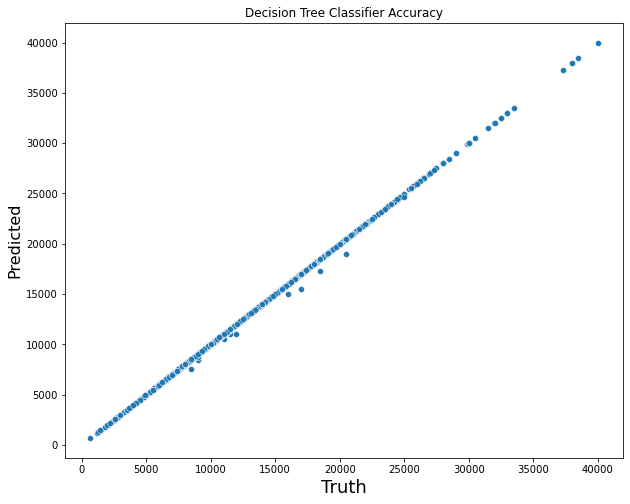

In [41]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title=("Accuracy")
sns.scatterplot(x = y_test,y = y_predicted) .set(title="Decision Tree Classifier Accuracy")
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)   

Text(0, 0.5, 'Predicted')

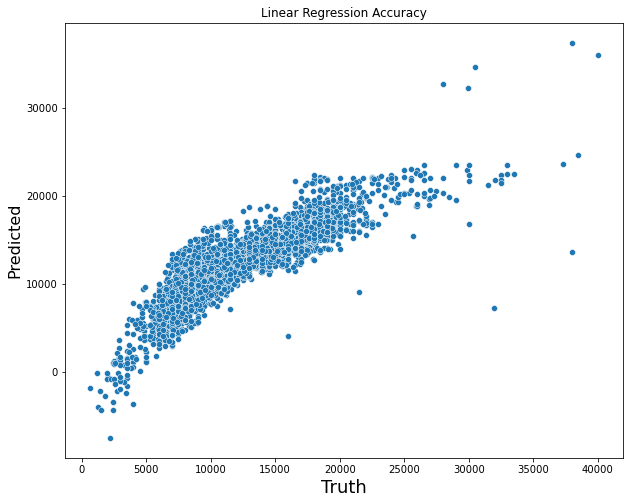

In [40]:
model = LinearRegression()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title=("Accuracy")
sns.scatterplot(x = y_test,y = y_predicted).set(title="Linear Regression Accuracy")
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)   

<h2>Conclusion<h2>

From this exploration of Ford Car Prices, we were successful in being able to predict Ford Car Prices, with out best model being the Decision Tree Classifier with 99% accuracy on the testing set and Linear Regression achieving 75% accuracy. We were also able to visualize the positive and negative correlations with price across the columns, showing that mileage and miles per gallon negatively affect the price while engine size has a strong correlation with price. 